# Оценка Видимости Космического Аппарата

## Оглавление

1. **[Погружение в предметную область](#section1)**
   - [1.1 Определение системы координат](#section1-1)
   - [1.2 Определение временной шкалы](#section1-2)
   - [1.3 Определение видимости космического аппарата](#section1-3)
   - [1.4 Физические факторы](#section1-4)

2. **[Математическая модель](#section2)**

3. **[Реализация](#section3)**
   - [3.1 Функциональные требования](#section3-1)
   - [3.2 Программные требования](#section3-2)
   - [3.3 Код](#section3-3)

4. **[Проверка](#section4)**
   - [4.1 Соответствие функциональным требованиям](#section4-1)
   - [4.2 Соответствие техническим требованиям](#section4-2)
   - [4.3 Тесты](#section4-3)
   - [4.4 Валидация](#section4-4)

5. **[Визуализация результатов](#section5)**

<a id="section1"></a>
## 1. Погружение в предметную область

<a id="section1-1"></a>
### 1.1 Определение системы координат
#### 1.1.1 ECI (Earth Centic Inertial) J2000

Эта система координат **не** вращается вместе с поверхностью Земли. Она связана с центром масс Земли. Ось $x$ направлена в сторону Всеннего равноденствия в соответсвующую эпоху, это пересечение эклипктики и экватора на 1 января 2000 года. Ось $z$ препеньдикулярно плоскости экватора в сторону северного полюса Земли на момент 1го января 2000 года, а ось $y$ сообразно правой тройке в плоскости экватора. Так как суточному вращению Земли не подвержена удобна для определения координат космических аппаратов.

#### 1.1.2 Геодезические координаты

Положение наблюдателя задается при помощи географических координат, это градусная сетка на поверхности Земли. Широта отсчитыввется от экватора к полюсам, положительная к северному, отрицатиельная к южному, диапазон от -90 до 90. Долгота отсчитывается от Гривического меридиана, От гринвича на восток и запад, диапазон от -180 до 180. Высота отсчитыватеся от уровня моря. Эти координаты вращаются вместе с поверхностью Земли с их помощью удобно определять положение обхектов на Земле. 

#### 1.1.3 CIRS (Celestial Intermediate Reference System)

Инерциальная система с учетом прецессии и нутации.

#### 1.1.4 TIRS (Terrestrial Intermediate Reference System) Через ERA (Earth Rotation Angle)

Система вращающаяся с Землей но ось $x$ направлена к TIO (Terrestrial Intermediate Origin), промежуточный вариант учета движение полюсов из-за упругости Земли и перераспределения масс. 

#### 1.1.5 ITRS (International Terrestrial Reference System) 

Система учитывающая прецессию/нутацию, а также движение полюсов. 

#### 1.1.6 ERA (Earth Rotation Angle)

Угол поворота Земли относительно инерциальной системы с определенного момента времени



<a id="section1-2"></a>
### 1.2 Определение временной шкалы
#### 1.2.1 Момент наблюдения
Для определения углов между осями требуется понять сколько прошло времени от начала эпохи, так как Земля вращается вместе с наблюдателем. 
#### 1.2.2 UT1 (Universal Time 1) - каждые сутки начинается заново, 0 это когда проходит солнце через меридиан Гринвича. Ровно 25 часа.
#### 1.2.3 TAI (International Atomic Time) - международное атомное время 
основана на частоте излучения цезия-133, 1 января 1958 года 00:00:00 - условное начало

<a id="section1-3"></a>
### 1.3 Определение видимости космического аппарата
Видимость космического аппарата ограничевается порогом видимости - Значением угла над горидонтом. Из-за рельефа видимость может быть не абсолютной. 

<a id="section1-4"></a>
### 1.4 Физические факторы
Угол возвышения может диктоваться атмосферными помехами и препятсивями. Спутник совершенно точно должен быть выше горизонта. Атмосферные факторы также могут мешать видимости, погодные условия, источники электромагнитных излучений, дальность спутника видимость будет слабее с высотой орбиты. Также существует прецессия оси вращения.


<a id="section2"></a>
## 2. Математическая модель
В математической модели учитывается:
- Положение спутника относительно наблюдателя
- Положение относительно угла возвышения
- Прецессию оси вращения

В математической модели не будет учитываться:
- Атмосферные явления
- Погодные условия
- Источники электромогнитных излучений
- Дальность спутника
- Физические характеристики самого спутника
- Физические характеристики наблюдателя
- Нутация Земной оси вращения
- Движение Полюсов




<a id="section3"></a>
## 3. Реализация

<a id="section3-1"></a>
### 3.1 Функциональные требования

- Программа должна принимать фиксированные входные параметры
- Должна вычислять и выводить угол возвышения КА над горизонтом
- Должна определять видимость КА по заданному критерию
- Результат должен выводиться в консоль в формате: "Угол возвышения: XX.X градусов, КА виден/не виден"

<a id="section3-2"></a>
### 3.2 Программные требования

Для работы программы требуется:
- стандартная математическая баблиотека.
- Библиотека работы с датой и временем для конвертации временных форматов, вычисления сдвигов осей относительно друг друга.
- `jupytext`, `jupyter`, `ipykernel` для корректного отображения в виде ноутбука юпитера.

In [36]:
import math
import datetime
import numpy as np
import matplotlib.pyplot as plt

<a id="section3-3"></a>
### 3.3 Общая схема решения и код
Для решения задачи требуется получить 2 точки в пространстве, провести через них пряму, сравнить пороговый угол с углом между горизонтом и прямой соединяющей наблюдателя и космический аппарат.

Алгоритм:
### 1) Конвертировать положение КА из ECI J2000 в промежуточную систему координат https://www.aanda.org/articles/aa/pdf/2003/48/aa4068.pdf
#### ECI J2000 → CIRS(без нутации): для учета проецессии

$$\begin{bmatrix} x_{CIRS} \ y_{CIRS} \ z_{CIRS} \end{bmatrix} = \mathbf{P} \times \begin{bmatrix} x_{J2000} \ y_{J2000} \ z_{J2000} \end{bmatrix}$$

Матрица прецессии $\mathbf{P}$ ( https://trac.fact-project.org/browser/trunk/FACT%2B%2B/erfa/src/pfw06.c?rev=18921 IAU 2006) Углы фукушимы-Уильямса первые 3 члена:

$$T = \frac{JD}{36525}$$

Поворот точки весеннего равноденствия вдоль эклиптики из-за гравитационного Луны и солнца на Землю

$$\psi = \left(-0.041775 + 5038.481484 T + 1.5584175 T^2\right) \frac{\pi}{180 \times 3600}$$

Наклон эклиптики к экватору изменение наклона оси Земли к плоскости орбиты.

$$\varphi = \left(84381.412819 - 46.811016 T + 0.0511268 T^2\right) \frac{\pi}{180 \times 3600}$$

Планетарная прецессия, влияние других планет на орбиту Земли

$$\gamma = \left(-0.052928 + 10.556378 T + 0.4932044 T^2\right) \frac{\pi}{180 \times 3600}$$

$$\mathbf{P} = \mathbf{R}_3(-\gamma) \times \mathbf{R}_1(\varphi) \times \mathbf{R}_3(-\psi) \times \mathbf{R}_1(-\varepsilon_0)$$

Средний наклон Эклиптики J2000

$$\varepsilon_0 = 84381.406''$$

$\mathbf{R}_1(\alpha)$ - поворот вокруг оси X на угол $\alpha$:

$$\mathbf{R}_1(\alpha) = \begin{bmatrix}
    1 & 0 & 0 \\
    0 & \cos\alpha & \sin\alpha \\
    0 & -\sin\alpha & \cos\alpha
\end{bmatrix}$$

$\mathbf{R}_3(\alpha)$ - поворот вокруг оси Z на угол $\alpha$:

$$\mathbf{R}_3(\alpha) = \begin{bmatrix}
    \cos\alpha & \sin\alpha & 0 \\
    -\sin\alpha & \cos\alpha & 0 \\
    0 & 0 & 1
\end{bmatrix}$$



In [37]:
def j2000_to_cirs_precession_only(pos_j2000, jd_days_from_j2000):
    """
    Конвертация ECI J2000 в CIRS с учетом только прецессии
    pos_j2000: [x, y, z] в метрах в системе J2000
    jd_days_from_j2000: дни от эпохи J2000
    """
    T = jd_days_from_j2000 / 36525.0
    
    psi = (-0.041775 + 5038.481484 * T + 1.5584175 * T**2) * math.pi / (180 * 3600)
    phi = (84381.412819 - 46.811016 * T + 0.0511268 * T**2) * math.pi / (180 * 3600)
    gamma = (-0.052928 + 10.556378 * T + 0.4932044 * T**2) * math.pi / (180 * 3600)
    eps0 = 84381.406 * math.pi / (180 * 3600)
    
    def R1(angle):
        c, s = math.cos(angle), math.sin(angle)
        return np.array([[1, 0, 0], [0, c, s], [0, -s, c]])
    
    def R3(angle):
        c, s = math.cos(angle), math.sin(angle)
        return np.array([[c, s, 0], [-s, c, 0], [0, 0, 1]])
    
    P = R3(-gamma) @ R1(phi) @ R3(-psi) @ R1(-eps0)
    return (P @ np.array(pos_j2000)).tolist()



### 2) Конвертировать положение наблюдателя из геодезических координат в промежуточную систему координат

#### geo → ITRS (WGS84): для учета прецессии

$$N = \frac{a}{\sqrt{1 - e^2 \sin^2 \phi}}$$

$$
\begin{bmatrix} 
x_{ITRS} \\ 
y_{ITRS} \\ 
z_{ITRS} 
\end{bmatrix} = \begin{bmatrix} 
(N + h) \cos \phi \cos \lambda \\ 
(N + h) \cos \phi \sin \lambda \\ 
(N(1-e^2) + h) \sin \phi 
\end{bmatrix}
$$

Где $a$ -- большая полуось эллипсоида WGS84 (экваториальный радиус Земли), $a = 6378137 м$

$e^2$ -- квадрат первого эксцентриситета эллипсоида WGS84, $e^2 = 0.00669438002290$

$N$ -- радиус кривизны первого вертикала, зависит от широты φ и показывает расстояние от точки на поверхности до оси вращения Земли в плоскости меридиана.

$\phi$ -- Широта

$\lambda$ -- Долгота

$h$ -- высота


In [38]:
def geodetic_to_itrs(lat_deg, lon_deg, height_m):
    """
    Конвертация геодезических координат в ITRS (WGS84)
    lat_deg: широта в градусах
    lon_deg: долгота в градусах  
    height_m: высота в метрах над эллипсоидом
    """
    import math
    
    # Параметры WGS84
    a = 6378137.0  # большая полуось в метрах
    e2 = 0.00669438002290  # квадрат эксцентриситета
    
    # Конвертация в радианы
    lat_rad = math.radians(lat_deg)
    lon_rad = math.radians(lon_deg)
    
    # Радиус кривизны первого вертикала
    N = a / math.sqrt(1 - e2 * math.sin(lat_rad)**2)
    
    # Декартовы координаты ITRS
    x = (N + height_m) * math.cos(lat_rad) * math.cos(lon_rad)
    y = (N + height_m) * math.cos(lat_rad) * math.sin(lon_rad)
    z = (N * (1 - e2) + height_m) * math.sin(lat_rad)
    
    return [x, y, z]


#### ITRS (WGS84) → CIRS (прямое преобразование с учетом вращения Земли)

$$
\begin{bmatrix} 
x_{CIRS} \\ 
y_{CIRS} \\ 
z_{CIRS} 
\end{bmatrix} = \mathbf{R}_3(-ERA) \times \begin{bmatrix} 
x_{ITRS} \\ 
y_{ITRS} \\ 
z_{ITRS} 
\end{bmatrix}
$$

$$ERA = 2\pi(0.7790572732640 + 1.00273781191135448 \times (JD_{2000}))$$



In [39]:
def itrs_to_cirs(pos_itrs, jd_days_from_j2000):
    """
    Конвертация ITRS в CIRS с учетом вращения Земли (без движения полюсов)
    pos_itrs: [x, y, z] в метрах в системе ITRS
    jd_days_from_j2000: дни от эпохи J2000
    """
    
    # Вычисление ERA (Earth Rotation Angle)
    era = 2 * math.pi * (0.7790572732640 + 1.00273781191135448 * jd_days_from_j2000)
    
    # Матрица поворота R3(-ERA)
    c = math.cos(-era)
    s = math.sin(-era)
    
    # Применяем поворот вокруг оси Z
    x_cirs = c * pos_itrs[0] + s * pos_itrs[1]
    y_cirs = -s * pos_itrs[0] + c * pos_itrs[1]
    z_cirs = pos_itrs[2]  # Z координата не изменяется
    
    return [x_cirs, y_cirs, z_cirs]



### 3) Вычислить угол возвышения

$$\vec{r}_{sat-obs} = \vec{r}_{sat,CIRS} - \vec{r}_{obs,CIRS}$$

$$elevation = \arcsin\left(\frac{\vec{r}_{sat-obs} \cdot \hat{z}_{local}}{|\vec{r}_{sat-obs}|}\right)$$

$\vec{r}_{sat-obs}$ -- вектор направленный от наблюдателя к космическому аппарату

$\vec{r}_{sat,CIRS}$ -- позиция спутника в системе CIRS

$\vec{r}_{obs,CIRS}$ -- позиция наблюдателя в системе CIRS

$\hat{z}_{local}$ -- единичный вектор локальной вертикали

$|\vec{r}_{sat-obs}|$ -- модуль (длина) вектора от наблюдателя к спутнику

$elevation$ -- угол возвышения в радианах

$elevation_{min}$ -- минимальный угол видимости


In [40]:
def calculate_elevation(sat_pos_cirs, obs_pos_cirs, obs_lat_rad):
    """
    Вычисление угла возвышения спутника над горизонтом
    sat_pos_cirs: [x, y, z] позиция спутника в CIRS
    obs_pos_cirs: [x, y, z] позиция наблюдателя в CIRS  
    obs_lat_rad: широта наблюдателя в радианах
    """
    sat_obs_vec = np.array(sat_pos_cirs) - np.array(obs_pos_cirs)
    vec_length = np.linalg.norm(sat_obs_vec)
    
    obs_pos = np.array(obs_pos_cirs)
    z_local = obs_pos / np.linalg.norm(obs_pos)
    
    dot_product = np.dot(sat_obs_vec, z_local)
    elevation_rad = math.asin(dot_product / vec_length)
    elevation_deg = math.degrees(elevation_rad)
    
    return elevation_deg



### 4) Проверить видимость


In [41]:
def check_visibility(sat_pos_j2000, obs_lat_deg, obs_lon_deg, obs_height_m, 
                    jd_days_from_j2000, min_elevation_deg=0):
    """
    Проверка видимости спутника
    """
    import math
    
    # Конвертация спутника J2000 → CIRS
    sat_pos_cirs = j2000_to_cirs_precession_only(sat_pos_j2000, jd_days_from_j2000)
    
    # Конвертация наблюдателя геодезические → ITRS → CIRS
    obs_pos_itrs = geodetic_to_itrs(obs_lat_deg, obs_lon_deg, obs_height_m)
    obs_pos_cirs = itrs_to_cirs(obs_pos_itrs, jd_days_from_j2000)
    
    # Вычисление угла возвышения
    elevation_deg = calculate_elevation(sat_pos_cirs, obs_pos_cirs, math.radians(obs_lat_deg))
    
    # Проверка видимости
    is_visible = elevation_deg > min_elevation_deg
    visibility_text = "виден" if is_visible else "не виден"
    
    print(f"Угол возвышения: {elevation_deg:.1f} градусов, КА {visibility_text}")
    
    return elevation_deg, is_visible

<a id="section4"></a>
## 4. Проверка

<a id="section4-1"></a>
### 4.1 Соответствие функциональным требованиям

**Проверка выполнения функциональных требований:**
**Требование 1:** Программа принимает фиксированные входные параметры
- Координаты КА в ECI J2000: [x, y, z] в метрах
- Геодезические координаты наблюдателя: широта, долгота (градусы), высота (метры)
- Время наблюдения: дни от эпохи J2000
- Минимальный угол видимости: градусы

**Требование 2:** Вычисляет и выводит угол возвышения КА над горизонтом
- Функция `calculate_elevation()` вычисляет угол через скалярное произведение

**Требование 3:** Определяет видимость КА по заданному критерию
- Сравнение: `elevation_deg > min_elevation_deg`
- Возвращает булево значение видимости

**Требование 4:** Результат выводится в требуемом формате
- Формат: "Угол возвышения: XX.X градусов, КА виден/не виден"
- Реализовано в функции `check_visibility()`

<a id="section4-2"></a>
### 4.2 Соответствие техническим требованиям

**Проверка выполнения технических требований:**

**Требование 1:** Язык реализации -- современный
- Использован Python 3.11+ -- современный

**Требование 2:** Код читаемый и соответствует стандартам

**Требование 3:** Обязательная документация функций
- Все функции содержат docstring с описанием
- Указаны параметры и возвращаемые значения
- Приведены единицы измерения

**Требование 4:** Модульные тесты для сложных вычислений
- Тесты для функции прецессии: `test_j2000_to_cirs_precession()`
- Тесты для геодезических преобразований: `test_geodetic_to_itrs()`
- Тесты для вращения Земли: `test_itrs_to_cirs_simple()`
- Тесты видимости: `test_satellite_visibility()`

<a id="section4-3"></a>
### 4.3 Тесты

In [42]:
def test_j2000_to_cirs_precession():
    """Тесты для проверки функции прецессии"""
    print("=" * 60)
    print("ТЕСТ ФУНКЦИИ ПРЕЦЕССИИ J2000 → CIRS")
    print("=" * 60)
    
    # Тест 1: В эпоху J2000 (t=0) преобразование должно быть близко к единичной матрице
    pos_j2000 = [6378137, 0, 0]
    pos_cirs = j2000_to_cirs_precession_only(pos_j2000, 0)
    diff = sum((pos_cirs[i] - pos_j2000[i])**2 for i in range(3))**0.5
    print("Тест 1: Разность при t=0")
    print("Входные данные:", pos_j2000)
    print("Результат:", pos_cirs)
    print("Разность:", diff, "м")
    print("Ожидается: <1000 м")
    print("Статус:", "ПРОЙДЕН" if diff < 1000 else "ПРОВАЛЕН")
    print()
    
    # Тест 2: Проверка сохранения длины вектора
    pos_j2000 = [7000000, 1000000, 2000000]
    pos_cirs = j2000_to_cirs_precession_only(pos_j2000, 7305)
    len_j2000 = sum(x**2 for x in pos_j2000)**0.5
    len_cirs = sum(x**2 for x in pos_cirs)**0.5
    print("Тест 2: Сохранение длины вектора")
    print("Длина J2000:", len_j2000, "м")
    print("Длина CIRS:", len_cirs, "м")
    print("Разность длин:", abs(len_j2000 - len_cirs), "м")
    print("Ожидается: <0.1 м")
    print("Статус:", "ПРОЙДЕН" if abs(len_j2000 - len_cirs) < 0.1 else "ПРОВАЛЕН")
    print()
    
    # Тест 3: Проверка величины прецессии за 100 лет
    pos_j2000 = [6378137, 0, 0]
    pos_cirs_100y = j2000_to_cirs_precession_only(pos_j2000, 36525)
    angle = math.atan2(pos_cirs_100y[1], pos_cirs_100y[0])
    angle_arcsec = angle * 180 * 3600 / math.pi
    print("Тест 3: Прецессия за 100 лет")
    print("Угол поворота:", angle_arcsec, "угловых секунд")
    print("Ожидается: ~5000 угловых секунд")
    print("Статус:", "ПРОЙДЕН" if 4000 < angle_arcsec < 6000 else "ПРОВАЛЕН")
    print()

def test_geodetic_to_itrs():
    """Тесты для проверки конвертации геодезических координат"""
    print("=" * 60)
    print("ТЕСТ КОНВЕРТАЦИИ ГЕОДЕЗИЧЕСКИХ КООРДИНАТ")
    print("=" * 60)
    
    # Тест 1: Экватор
    pos = geodetic_to_itrs(0, 0, 0)
    expected_radius = 6378137.0
    actual_radius = (pos[0]**2 + pos[1]**2 + pos[2]**2)**0.5
    print("Тест 1: Точка на экваторе")
    print("Координаты:", pos)
    print("Радиус:", actual_radius, "м")
    print("Ожидается:", expected_radius, "м")
    print("Статус:", "ПРОЙДЕН" if abs(actual_radius - expected_radius) < 1 else "ПРОВАЛЕН")
    print()
    
    # Тест 2: Северный полюс
    pos_pole = geodetic_to_itrs(90, 0, 0)
    print("Тест 2: Северный полюс")
    print("Координаты: x =", pos_pole[0], "y =", pos_pole[1], "z =", pos_pole[2])
    print("Ожидается: x ≈ 0, y ≈ 0, z ≈ 6356752 м")
    print("Статус:", "ПРОЙДЕН" if abs(pos_pole[0]) < 1 and abs(pos_pole[1]) < 1 and 6356000 < pos_pole[2] < 6357000 else "ПРОВАЛЕН")
    print()
    
    # Тест 3: Проверка высоты
    pos_sea = geodetic_to_itrs(45, 0, 0)
    pos_1km = geodetic_to_itrs(45, 0, 1000)
    height_diff = ((pos_1km[0]**2 + pos_1km[1]**2 + pos_1km[2]**2)**0.5 - 
                   (pos_sea[0]**2 + pos_sea[1]**2 + pos_sea[2]**2)**0.5)
    print("Тест 3: Разность высот")
    print("Разность для 1 км:", height_diff, "м")
    print("Ожидается: ~1000 м")
    print("Статус:", "ПРОЙДЕН" if 990 < height_diff < 1010 else "ПРОВАЛЕН")
    print()

def test_itrs_to_cirs_rotation():
    """Тест поворота ITRS → CIRS"""
    print("=" * 60)
    print("ТЕСТ ПОВОРОТА ITRS → CIRS")
    print("=" * 60)
    
    # Тест 1: ERA за день
    era_0 = 2 * math.pi * (0.7790572732640 + 1.00273781191135448 * 0)
    era_1 = 2 * math.pi * (0.7790572732640 + 1.00273781191135448 * 1)
    era_diff = era_1 - era_0
    era_diff_deg = math.degrees(era_diff)
    print("Тест 1: ERA за день")
    print("Изменение ERA:", era_diff_deg, "градусов")
    print("Ожидается: ~361 градусов")
    print("Статус:", "ПРОЙДЕН" if 360 < era_diff_deg < 362 else "ПРОВАЛЕН")
    print()
    
    # Тест 2: Поворот координат
    pos_itrs = [6378137, 0, 0]
    pos_cirs_0 = itrs_to_cirs(pos_itrs, 0)
    pos_cirs_1 = itrs_to_cirs(pos_itrs, 1)
    
    func_angle_0 = math.atan2(pos_cirs_0[1], pos_cirs_0[0])
    func_angle_1 = math.atan2(pos_cirs_1[1], pos_cirs_1[0])
    func_diff = math.degrees(func_angle_1 - func_angle_0)
    print("Тест 2: Поворот координат за день")
    print("Поворот:", func_diff, "градусов")
    print("Ожидается: ~361 градусов")
    print("Статус:", "ПРОЙДЕН" if 360 < abs(func_diff) < 362 else "ПРОВАЛЕН")
    print()

def test_satellite_visibility():
    """Тесты видимости спутника"""
    print("=" * 60)
    print("ТЕСТ ВИДИМОСТИ СПУТНИКА")
    print("=" * 60)
    
    # Тест 1: Спутник в зените над северным полюсом
    print("Тест 1: Спутник в зените над северным полюсом")
    print("Спутник:", [0, 0, 7000000])
    print("Наблюдатель: широта 90, долгота 0, высота 0")
    sat_pos_j2000 = [0, 0, 7000000]
    elevation, visible = check_visibility(sat_pos_j2000, 90, 0, 0, 0)
    print("Ожидается: высокий угол, виден")
    print("Статус:", "ПРОЙДЕН" if elevation > 80 and visible else "ПРОВАЛЕН")
    print()
    
    # Тест 2: Проверка порога видимости 15 градусов
    print("Тест 2: Проверка порога видимости 15 градусов")
    print("Спутник:", [0, 0, 7000000])
    print("Наблюдатель: широта 90, долгота 0, высота 0")
    print("Минимальный угол: 15 градусов")
    sat_pos_j2000 = [0, 0, 7000000]
    elevation, visible = check_visibility(sat_pos_j2000, 90, 0, 0, 0, 15)
    print("Ожидается: виден при пороге 15 градусов")
    print("Статус:", "ПРОЙДЕН" if visible else "ПРОВАЛЕН")
    print()
    
    # Тест 3: Спутник на противоположной стороне Земли
    print("Тест 3: Спутник на противоположной стороне Земли")
    print("Спутник:", [-7000000, 0, 0])
    print("Наблюдатель: широта 0, долгота 0, высота 0")
    sat_pos_j2000 = [-7000000, 0, 0]
    elevation, visible = check_visibility(sat_pos_j2000, 0, 0, 0, 0)
    print("Ожидается: отрицательный угол, не виден")
    print("Статус:", "ПРОЙДЕН" if elevation < 0 and not visible else "ПРОВАЛЕН")
    print()

print("ЗАПУСК ВСЕХ ТЕСТОВ")
print("=" * 60)
test_j2000_to_cirs_precession()
test_geodetic_to_itrs()
test_itrs_to_cirs_rotation()
test_satellite_visibility()

ЗАПУСК ВСЕХ ТЕСТОВ
ТЕСТ ФУНКЦИИ ПРЕЦЕССИИ J2000 → CIRS
Тест 1: Разность при t=0
Входные данные: [6378137, 0, 0]
Результат: [6378136.999999355, -2.821819712918312, 0.5138363645053183]
Разность: 2.868221452695528 м
Ожидается: <1000 м
Статус: ПРОЙДЕН

Тест 2: Сохранение длины вектора
Длина J2000: 7348469.228349534 м
Длина CIRS: 7348469.228349534 м
Разность длин: 0.0 м
Ожидается: <0.1 м
Статус: ПРОЙДЕН

Тест 3: Прецессия за 100 лет
Угол поворота: 4635.704699925373 угловых секунд
Ожидается: ~5000 угловых секунд
Статус: ПРОЙДЕН

ТЕСТ КОНВЕРТАЦИИ ГЕОДЕЗИЧЕСКИХ КООРДИНАТ
Тест 1: Точка на экваторе
Координаты: [6378137.0, 0.0, 0.0]
Радиус: 6378137.0 м
Ожидается: 6378137.0 м
Статус: ПРОЙДЕН

Тест 2: Северный полюс
Координаты: x = 3.918620924879089e-10 y = 0.0 z = 6356752.314140359
Ожидается: x ≈ 0, y ≈ 0, z ≈ 6356752 м
Статус: ПРОЙДЕН

Тест 3: Разность высот
Разность для 1 км: 999.9943614033982 м
Ожидается: ~1000 м
Статус: ПРОЙДЕН

ТЕСТ ПОВОРОТА ITRS → CIRS
Тест 1: ERA за день
Изменение ERA: 360.

<a id="section5"></a>
## 5. Визуализация результатов

Пример визуализации:


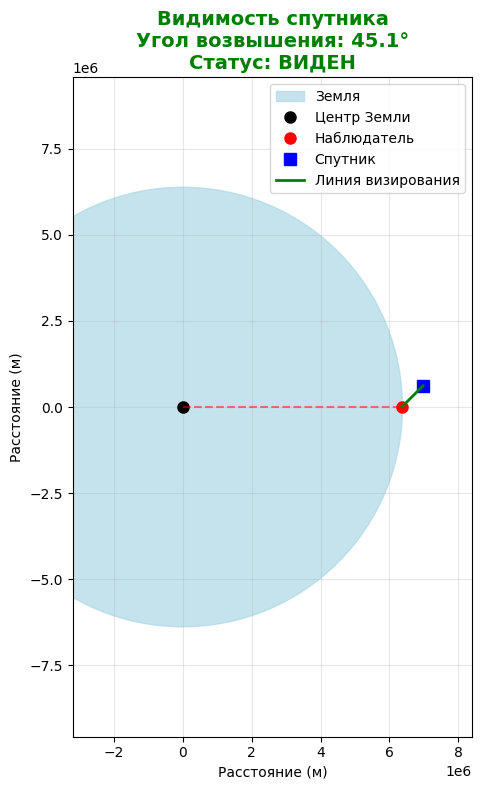

(45.08932020095079, True)

In [44]:
def visualize_satellite_visibility(sat_pos_j2000, obs_lat_deg, obs_lon_deg, obs_height_m, 
                                 jd_days_from_j2000, min_elevation_deg=0):
    """
    Визуализация видимости спутника с графиком
    """
    # Вычисляем позиции
    sat_pos_cirs = j2000_to_cirs_precession_only(sat_pos_j2000, jd_days_from_j2000)
    obs_pos_itrs = geodetic_to_itrs(obs_lat_deg, obs_lon_deg, obs_height_m)
    obs_pos_cirs = itrs_to_cirs(obs_pos_itrs, jd_days_from_j2000)
    
    elevation_deg = calculate_elevation(sat_pos_cirs, obs_pos_cirs, np.radians(obs_lat_deg))
    is_visible = elevation_deg > min_elevation_deg
    
    # Создаем фигуру
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Находим плоскость через центр Земли, наблюдателя и спутник
    earth_center = np.array([0, 0, 0])
    observer = np.array(obs_pos_cirs)
    satellite = np.array(sat_pos_cirs)
    
    # Проецируем на плоскость для 2D визуализации
    obs_dist = np.linalg.norm(observer)
    sat_dist = np.linalg.norm(satellite)
    
    # Угол между наблюдателем и спутником от центра Земли
    cos_angle = np.dot(observer, satellite) / (obs_dist * sat_dist)
    angle = np.arccos(np.clip(cos_angle, -1, 1))
    
    # 2D координаты в плоскости
    obs_2d = np.array([obs_dist, 0])
    sat_2d = np.array([sat_dist * np.cos(angle), sat_dist * np.sin(angle)])
    earth_2d = np.array([0, 0])
    
    # Радиус Земли
    earth_radius = 6378137
    
    # Рисуем Землю
    circle = plt.Circle(earth_2d, earth_radius, color='lightblue', alpha=0.7, label='Земля')
    ax.add_patch(circle)
    
    # Рисуем точки
    ax.plot(*earth_2d, 'ko', markersize=8, label='Центр Земли')
    ax.plot(*obs_2d, 'ro', markersize=8, label='Наблюдатель')
    ax.plot(*sat_2d, 'bs', markersize=8, label='Спутник')
    
    # Рисуем линии
    ax.plot([earth_2d[0], obs_2d[0]], [earth_2d[1], obs_2d[1]], 'r--', alpha=0.5)
    ax.plot([obs_2d[0], sat_2d[0]], [obs_2d[1], sat_2d[1]], 'g-', linewidth=2, label='Линия визирования')
    
    # Зона видимости (касательные к Земле от наблюдателя)
    if obs_dist > earth_radius:
        # Угол к горизонту
        horizon_angle = np.arcsin(earth_radius / obs_dist)
        
        # Касательные точки
        tangent_angle1 = -horizon_angle
        tangent_angle2 = horizon_angle
        
        # Длина касательной
        tangent_length = np.sqrt(obs_dist**2 - earth_radius**2)
        
        # Точки касания
        tang1_x = obs_2d[0] + tangent_length * np.cos(tangent_angle1)
        tang1_y = obs_2d[1] + tangent_length * np.sin(tangent_angle1)
        
        tang2_x = obs_2d[0] + tangent_length * np.cos(tangent_angle2)
        tang2_y = obs_2d[1] + tangent_length * np.sin(tangent_angle2)
        
        # Рисуем зону видимости
        ax.plot([obs_2d[0], tang1_x], [obs_2d[1], tang1_y], 'orange', alpha=0.7, label='Граница видимости')
        ax.plot([obs_2d[0], tang2_x], [obs_2d[1], tang2_y], 'orange', alpha=0.7)
        
        # Заливаем зону видимости
        max_dist = max(sat_dist, obs_dist) * 1.2
        
        # Создаем веер лучей в зоне видимости
        angles = np.linspace(tangent_angle1, tangent_angle2, 20)
        for angle in angles[::3]:  # Каждый третий луч
            end_x = obs_2d[0] + max_dist * np.cos(angle)
            end_y = obs_2d[1] + max_dist * np.sin(angle)
            ax.plot([obs_2d[0], end_x], [obs_2d[1], end_y], 'yellow', alpha=0.3, linewidth=0.5)
    
    # Настройки графика
    ax.set_xlim(-earth_radius * 0.5, max(sat_dist, obs_dist) * 1.2)
    ax.set_ylim(-earth_radius * 1.5, earth_radius * 1.5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Заголовок с результатами
    visibility_text = "ВИДЕН" if is_visible else "НЕ ВИДЕН"
    color = 'green' if is_visible else 'red'
    
    ax.set_title(f'Видимость спутника\n'
                f'Угол возвышения: {elevation_deg:.1f}°\n'
                f'Статус: {visibility_text}', 
                fontsize=14, color=color, weight='bold')
    
    ax.set_xlabel('Расстояние (м)')
    ax.set_ylabel('Расстояние (м)')
    
    plt.tight_layout()
    plt.show()
    
    return elevation_deg, is_visible

# Пример использования визуализации
print("Пример визуализации:")
visualize_satellite_visibility([0, 0, 7000000], 85, 0, 0, 0, 10)